In [1]:
from sympy import Symbol,solve
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats
%matplotlib inline
r_m=76.2
beta_T=0.82
h_0=2.46
c=0.05
x_f=26.6
beta_f=0.28
q_f=0.83
A=3.55
beta_g=beta_f
x_g=x_f
p=10
N=5000

In [2]:
# Structral connectivity matrix
#Firing rate pattern
xi_pattern=np.random.normal(0,1,size=(p,N))
r_pattern=r_m/(1+np.exp(-beta_T*(xi_pattern-h_0)))
print(r_pattern)
C=np.zeros((N,N),dtype='int8')
for i in range(N):
    for j in range(N):
        if random.uniform(0,1)<c:
            C[i,j]=1

[[ 5.29998432  8.47748149 10.61122509 ...  7.34314218 15.0791991
  21.72736779]
 [ 2.96603743  2.21719437 13.66761094 ...  8.21399282 12.08490253
   2.43778251]
 [18.99184538 17.38766947  2.45698557 ...  9.49102829 11.31576971
   6.17529647]
 ...
 [ 8.8821427  14.4967813  13.79620911 ...  6.46304587 23.73574753
   5.47851207]
 [11.76072668  3.85467075  3.99179091 ...  9.33246725  7.57491441
   3.8345843 ]
 [ 3.41044716  7.78836565  7.8577857  ...  6.5257262   7.56157984
  17.17171257]]


In [3]:
#x = Symbol('x')
#def func(z):
#    I=np.exp(-z**2/2)*(2*x-1+np.tanh(beta_g*(r_m/(1+np.exp(-beta_T*(z-h_0)))-x_g)))
#    return I
#Sum2=0
#for i in range(N):
#    Sum2=Sum2+func(xi_pattern[0,i])
#q_g=solve(Sum2,x)[0]
#print(q_g)

In [4]:
#Final connectivity matrix J
q_g=0.99
J=np.zeros((N,N))
def f(r):
    return 0.5*(2*q_f-1+np.tanh(beta_f*(r-x_f)))
def g(r):
    return 0.5*(2*q_g-1+np.tanh(beta_g*(r-x_g)))
#equation 2
Sum=np.zeros((N,N))
for k in range(p):
    Sum=Sum+np.dot(f(np.transpose(r_pattern[k])).reshape(N,1),g(r_pattern[k]).reshape(1,N))
J=A*C/c/N*Sum
for i in range(N):
    J[i,i]=0

In [5]:
# initial firing rate
r0=np.random.uniform(0,5,N)
#for i in range(p):
#    for j in range(N):
#        r0[j]=np.random.normal(r_pattern[i,j],1)
print(r0)

[4.9713623  0.11317271 3.41086795 ... 1.23761344 1.23150501 4.25545211]


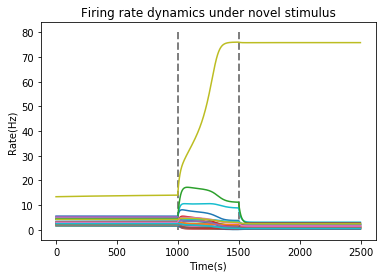

In [6]:
#Novel stimulus
t_p=1000
t_max=2500+t_p
r=np.zeros((N,t_max))
tau=20
t_pre=1000+t_p
t_delay=1500+t_p
dt=1
I0=1
ita=np.random.normal(0,1,size=N)
I=I0*ita
r[:,0]=r0
def phi(xi):
    return r_m/(1+np.exp(-beta_T*(xi-h_0)))
for t in range(1,t_pre):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
for t in range(t_pre,t_delay):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
for t in range(t_delay,t_max):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
plt.figure()
plt.title('Firing rate dynamics under novel stimulus')
plt.xlabel('Time(ms)')
plt.ylabel('Rate(Hz)')
plt.vlines(t_pre-t_p, 0,80, colors = "grey", linestyles = "dashed",linewidth=2)
plt.vlines(t_delay-t_p, 0,80, colors = "grey", linestyles = "dashed",linewidth=2)
for i in range(30):
    plt.plot(range(0,t_max-t_p),r[i,t_p:t_max])
plt.savefig('Figures/novel_stimulus.png')

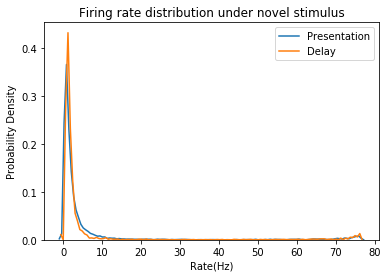

In [7]:
import seaborn as sns
plt.figure()
plt.title('Firing rate distribution under novel stimulus')
plt.xlabel('Rate(Hz)')
plt.ylabel('Probability Density')
sns.kdeplot(r[:,t_delay-1],label='Presentation')
sns.kdeplot(r[:,t_max-1],label='Delay')
plt.savefig('Figures/distribution_novel.png')

#Overlap
import scipy.stats
plt.figure()
plt.ylim(-0.2,1)
plt.title('Overlap under novel stimulus')
plt.xlabel('Time(s)')
plt.ylabel('Overlap(m)')

for i in range(p):
    ita=np.random.normal(0,1,size=N)
    I=I0*ita
    r[:,0]=r0
    for t in range(1,t_pre):
        xi=np.dot(J,r[:,t-1])
        r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
    for t in range(t_pre,t_delay):
        xi=np.dot(J,r[:,t-1])
        r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
    for t in range(t_delay,t_max):
        xi=np.dot(J,r[:,t-1])
        r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
    p_r=np.zeros(t_max-t_p)
    for t in range(0,t_max-t_p):
        p_r[t]=scipy.stats.pearsonr(r[:,t+t_p],r_pattern[i])[0]
    plt.plot(range(0,t_max-t_p),p_r)
plt.savefig("Figures/overlap_novel.png")

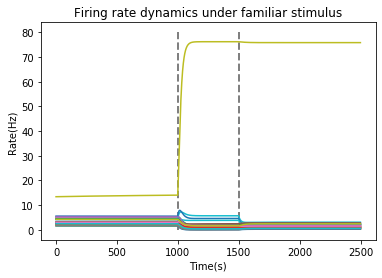

In [8]:
#Familiar Stimulus
I=I0*xi_pattern[0]
r[:,0]=r0

for t in range(1,t_pre):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
for t in range(t_pre,t_delay):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
for t in range(t_delay,t_max):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
plt.figure()
plt.title('Firing rate dynamics under familiar stimulus')
plt.xlabel('Time(ms)')
plt.ylabel('Rate(Hz)')
for i in range(30):
    plt.plot(range(0,t_max-t_p),r[i,t_p:t_max])
plt.vlines(t_pre-t_p, 0,80, colors = "grey", linestyles = "dashed",linewidth=2)
plt.vlines(t_delay-t_p, 0,80, colors = "grey", linestyles = "dashed",linewidth=2)
plt.savefig('Figures/familiar_stimulus.png')

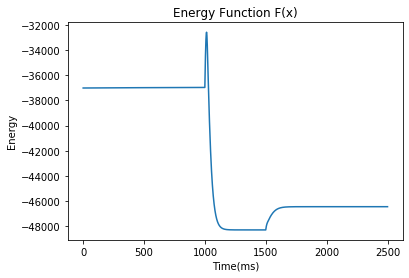

In [17]:
dist=np.ones(t_max-t_p)
#for i in range(p):
for t in range(t_p,t_max):
    dist[t-t_p]=-np.sum(abs(r[:,t]-r_pattern[0]))
plt.figure()
plt.title('Energy Function F(x)')
plt.xlabel('Time(ms)')
plt.ylabel('Energy')
plt.plot(range(0,t_max-t_p),dist)

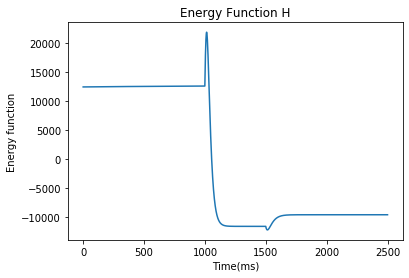

In [14]:
H=np.zeros(t_max-t_p)
#for i in range(p):
for t in range(t_p,t_max):
    H[t-t_p]=np.sum(-0.5*J*(np.dot(r[:,t].reshape(N,1),r[:,t].reshape(1,N))))+np.dot(I.reshape(1,N),r[:,t].reshape(N,1))
plt.figure()
plt.title('Energy Function H')
plt.xlabel('Time(ms)')
plt.ylabel('Energy')
plt.plot(range(0,t_max-t_p),H)

In [ ]:
plt.figure()
plt.title('Firing rate distribution under familiar stimulus')
plt.xlabel('Rate(Hz)')
plt.ylabel('Probability Density')
sns.kdeplot(r[:,t_delay-1],label='Presentation')
sns.kdeplot(r[:,t_max-1],label='Delay')
plt.savefig('Figures/distribution_familiar.png')

#Overlap
plt.figure()
plt.ylim(0,1)
plt.title('Overlap under familiar stimulus')
plt.xlabel('Time(s)')
plt.ylabel('Overlap(m)')

for i in range(p):
    I=I0*xi_pattern[i]
    r[:,0]=r0
    for t in range(1,t_pre):
        xi=np.dot(J,r[:,t-1])
        r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
    for t in range(t_pre,t_delay):
        xi=np.dot(J,r[:,t-1])
        r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
    for t in range(t_delay,t_max):
        xi=np.dot(J,r[:,t-1])
        r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
    p_r=np.zeros(t_max-t_p)
    for t in range(0,t_max-t_p):
        p_r[t]=scipy.stats.pearsonr(r[:,t+t_p],r_pattern[i])[0]
    plt.plot(range(0,t_max-t_p),p_r)
plt.savefig("Figures/overlap_familiar.png")